In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/ObesityDataSet.csv'
df = pd.read_csv(file_path)

In [6]:
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_W

In [7]:
print("\nJumlah Baris dan Kolom:", df.shape)
print("\nInformasi Dataset:")
print(df.info())


Jumlah Baris dan Kolom: (2111, 17)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   obje

In [8]:
print("\nDeskripsi Data:")
print(df.describe(include='all'))


Deskripsi Data:
         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             351  


In [10]:
kolom_numerik_potensial = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for kolom in kolom_numerik_potensial:
    if kolom in df.columns:
        try:
            df[kolom] = pd.to_numeric(df[kolom], errors='coerce')  # Ubah ke numerik, NaN untuk nilai tak valid
            print(f"Kolom {kolom} berhasil dikonversi ke numerik.")
        except:
            print(f"Kolom {kolom} tidak dapat dikonversi ke numerik.")

Kolom Age berhasil dikonversi ke numerik.
Kolom Height berhasil dikonversi ke numerik.
Kolom Weight berhasil dikonversi ke numerik.
Kolom FCVC berhasil dikonversi ke numerik.
Kolom NCP berhasil dikonversi ke numerik.
Kolom CH2O berhasil dikonversi ke numerik.
Kolom FAF berhasil dikonversi ke numerik.
Kolom TUE berhasil dikonversi ke numerik.


In [11]:
kolom_numerik = df.select_dtypes(include=['float64', 'int64']).columns

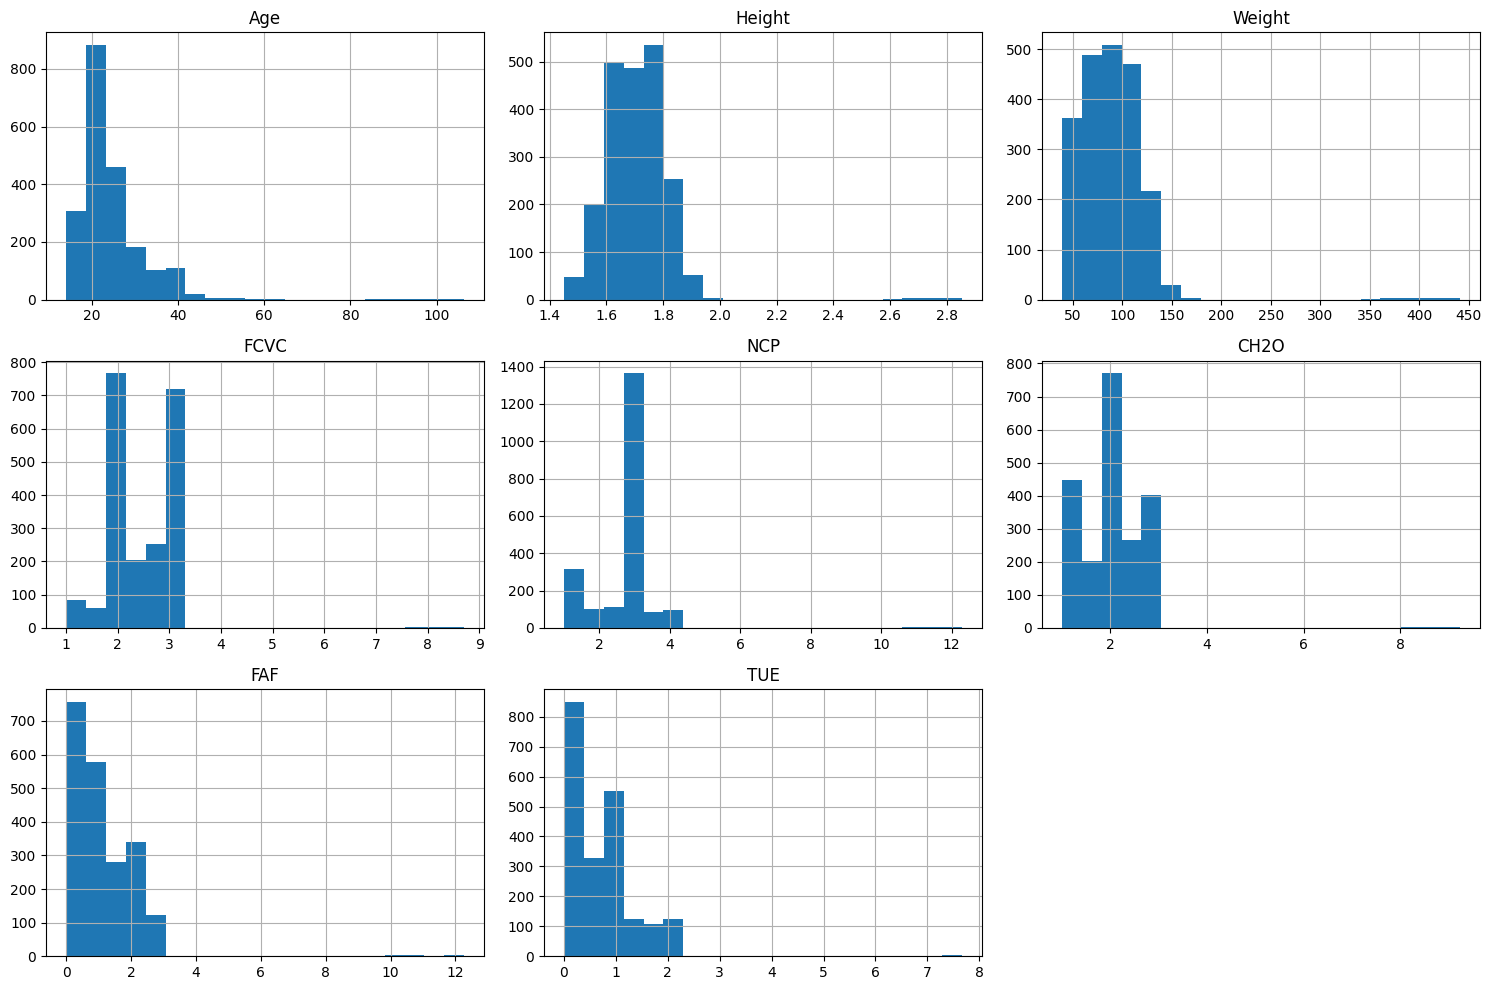

In [12]:
if len(kolom_numerik) > 0:
    df[kolom_numerik].hist(bins=20, figsize=(15, 10))
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom numerik untuk ditampilkan dalam histogram.")

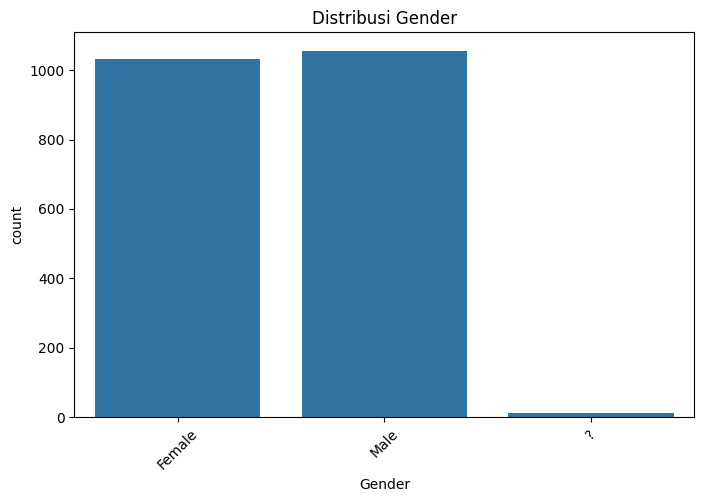

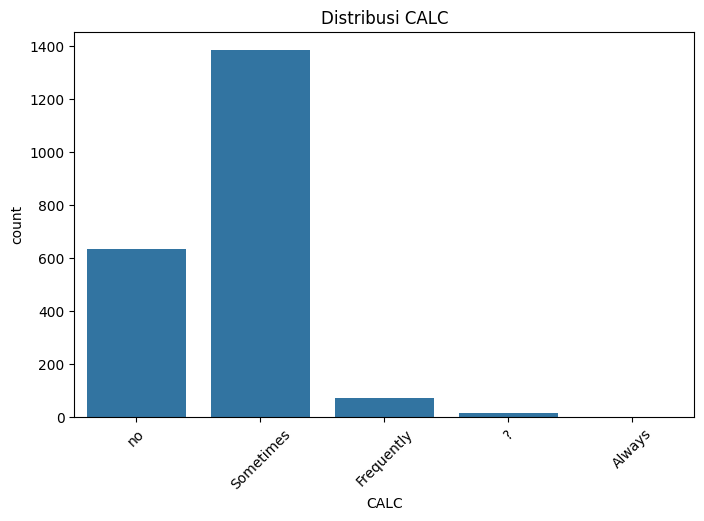

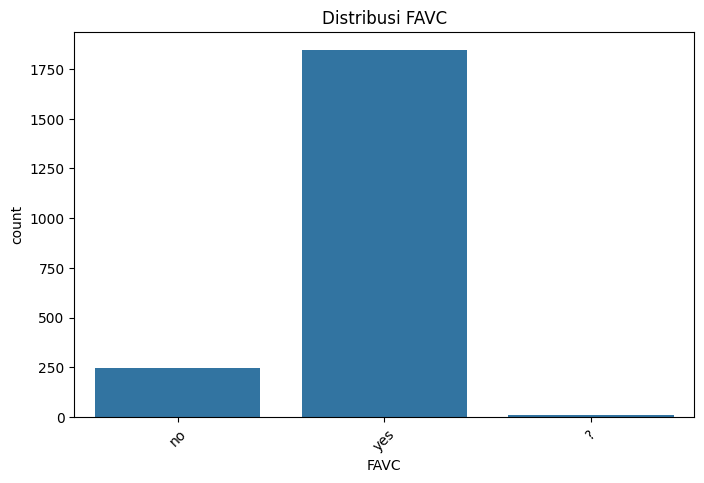

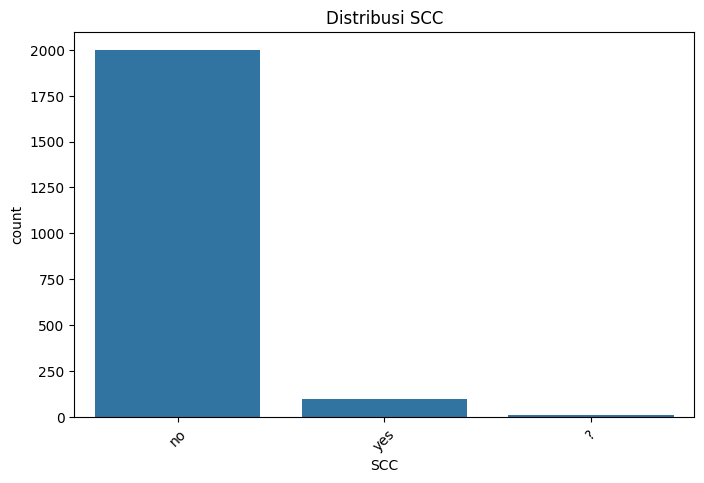

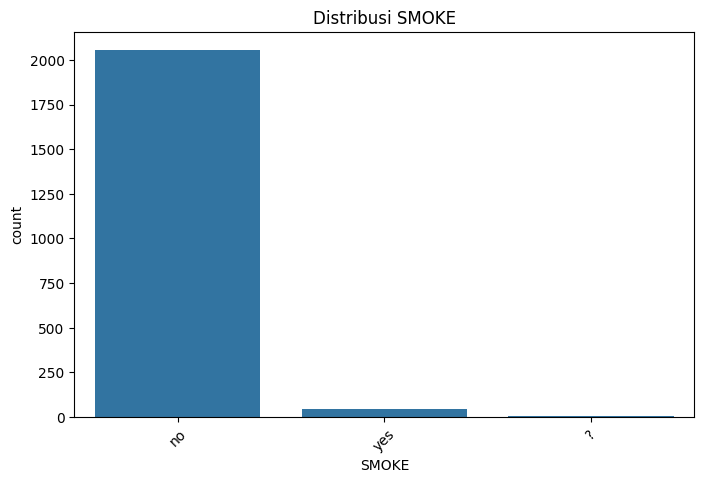

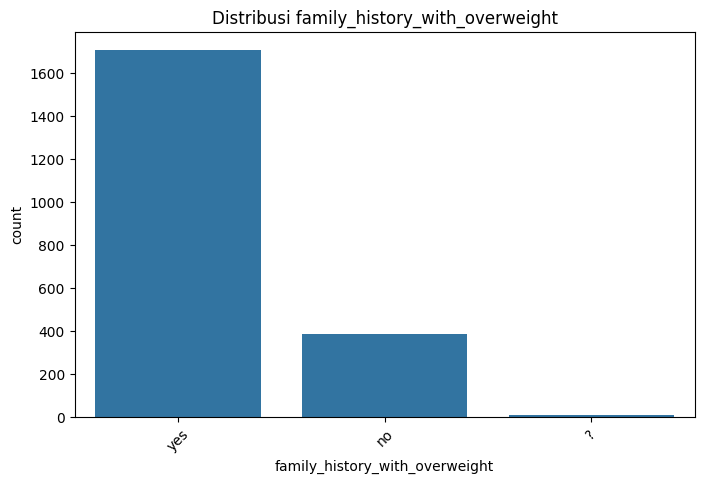

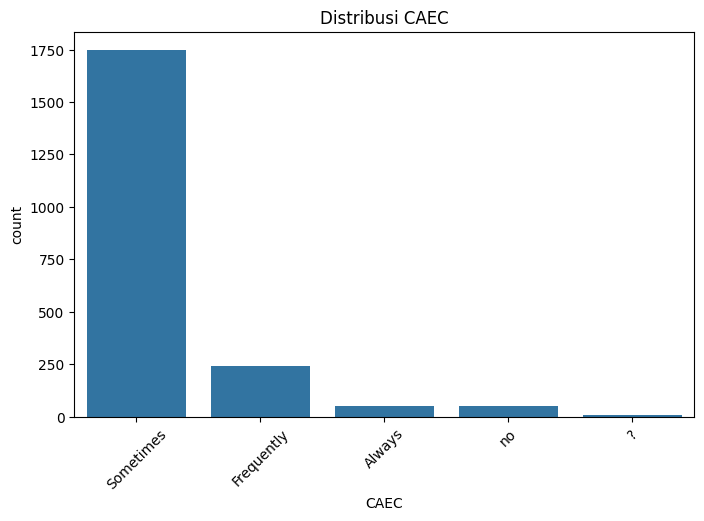

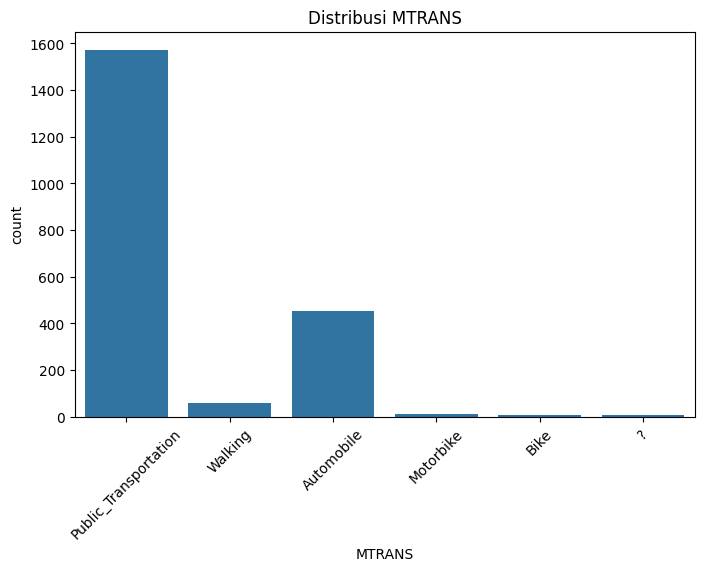

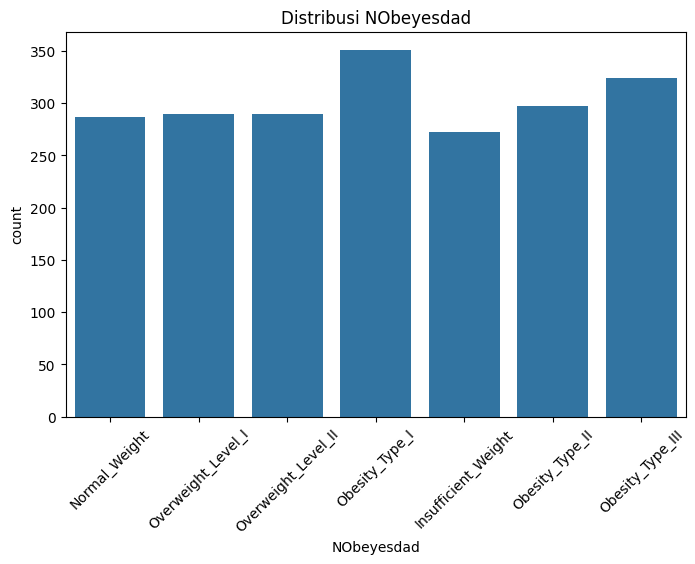

In [13]:
kolom_kategorikal = df.select_dtypes(include=['object']).columns
for kolom in kolom_kategorikal:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=kolom)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {kolom}')
    plt.show()

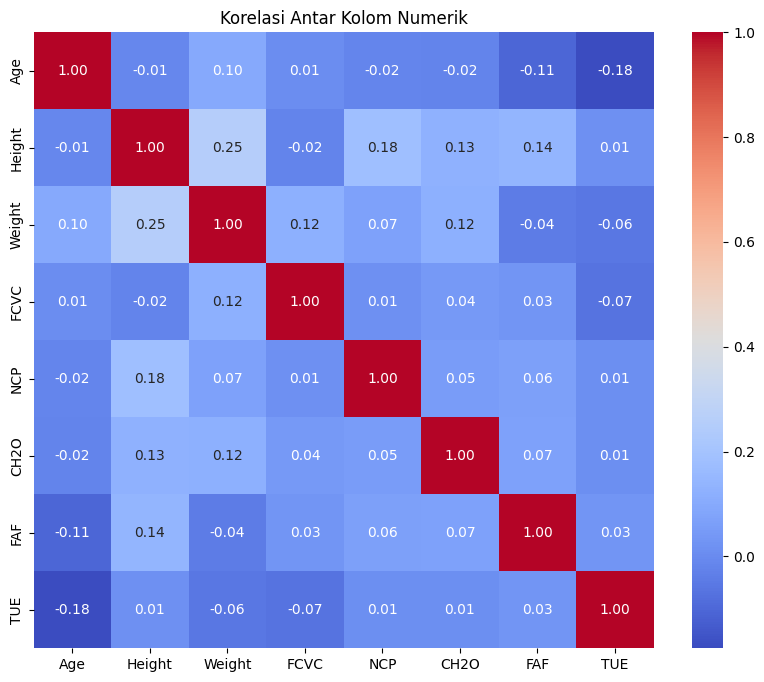

In [14]:
if len(kolom_numerik) > 0:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[kolom_numerik].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Korelasi Antar Kolom Numerik')
    plt.show()
else:
    print("Tidak ada kolom numerik untuk heatmap korelasi.")

In [15]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [16]:
print("\nJumlah Nilai Unik per Kolom:")
for kolom in df.columns:
    print(f"{kolom}: {df[kolom].nunique()} nilai unik")


Jumlah Nilai Unik per Kolom:
Age: 1393 nilai unik
Gender: 3 nilai unik
Height: 1561 nilai unik
Weight: 1517 nilai unik
CALC: 5 nilai unik
FAVC: 3 nilai unik
FCVC: 807 nilai unik
NCP: 636 nilai unik
SCC: 3 nilai unik
SMOKE: 3 nilai unik
CH2O: 1262 nilai unik
family_history_with_overweight: 3 nilai unik
FAF: 1185 nilai unik
TUE: 1129 nilai unik
CAEC: 5 nilai unik
MTRANS: 6 nilai unik
NObeyesdad: 7 nilai unik


In [17]:
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 18


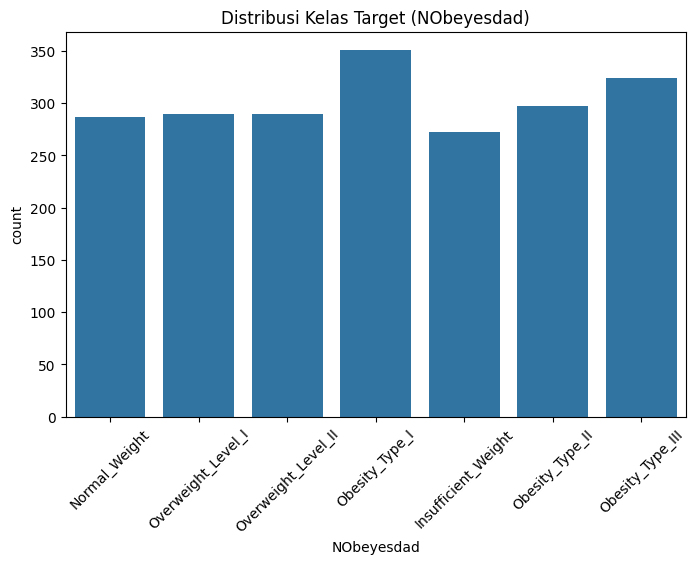


Distribusi Kelas Target:
NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


In [18]:
if 'NObeyesdad' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='NObeyesdad')
    plt.xticks(rotation=45)
    plt.title('Distribusi Kelas Target (NObeyesdad)')
    plt.show()
    print("\nDistribusi Kelas Target:")
    print(df['NObeyesdad'].value_counts(normalize=True))
else:
    print("Kolom 'NObeyesdad' tidak ditemukan di dataset.")

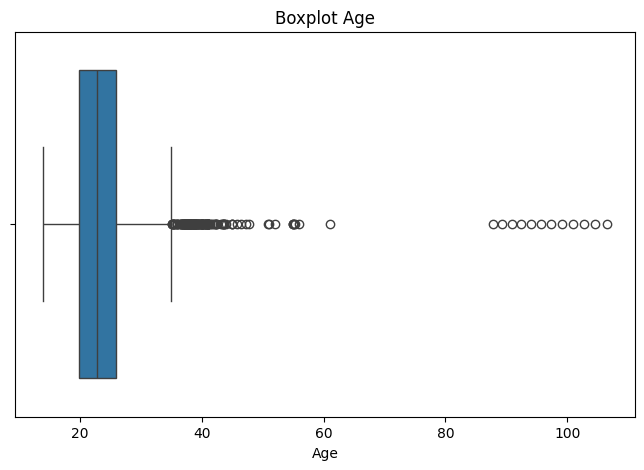

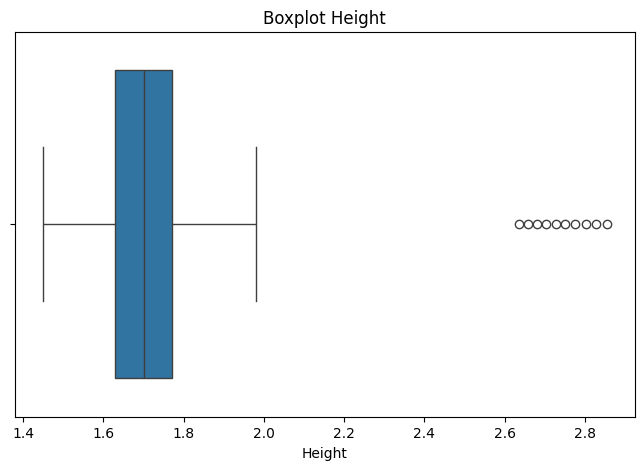

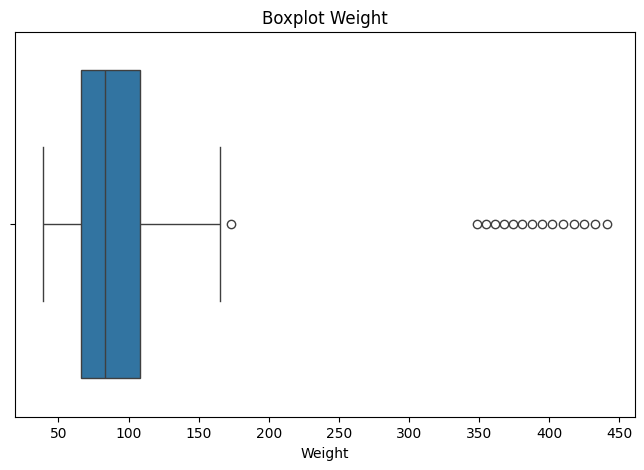

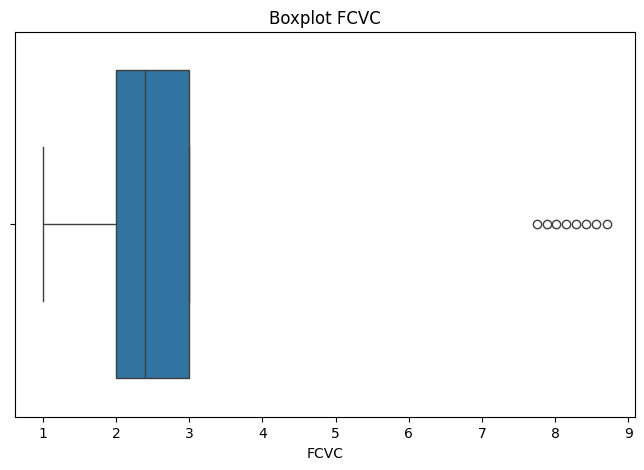

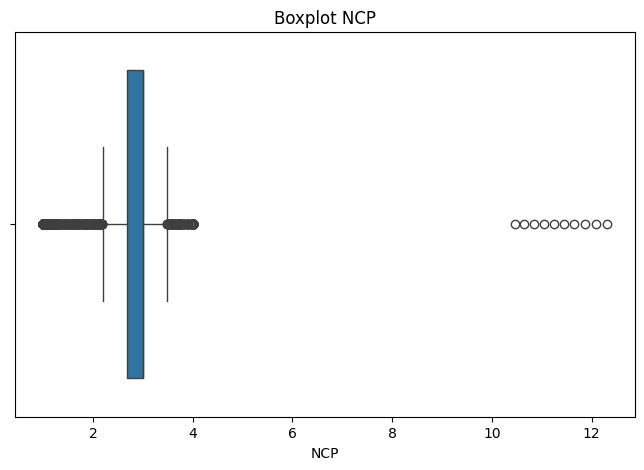

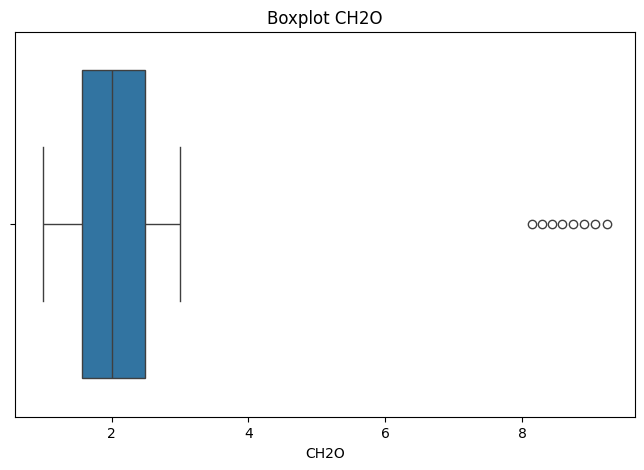

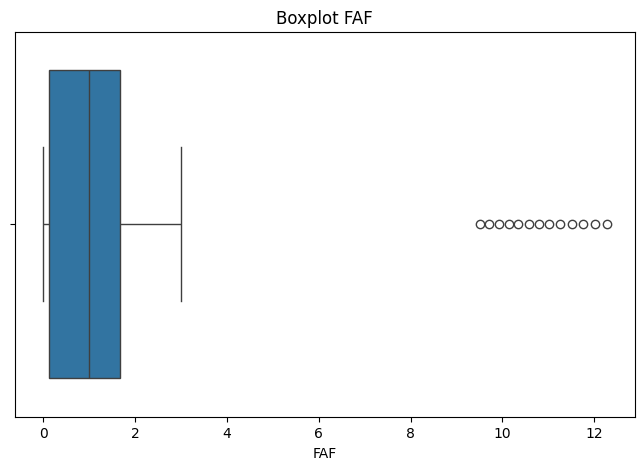

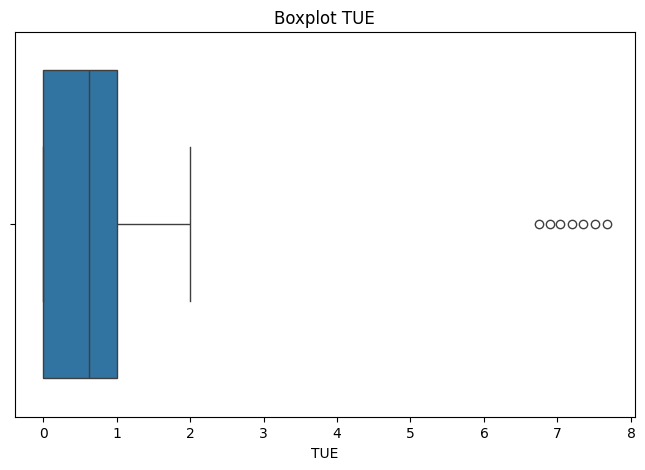

In [19]:
if len(kolom_numerik) > 0:
    for kolom in kolom_numerik:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=kolom)
        plt.title(f'Boxplot {kolom}')
        plt.show()
else:
    print("Tidak ada kolom numerik untuk deteksi outlier.")

In [21]:
print("\nKesimpulan dari EDA:")
print(f"1. Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")
print(f"2. Tipe data: {len(kolom_numerik)} kolom numerik, {len(kolom_kategorikal)} kolom kategorikal.")
print(f"3. Missing values: {'Tidak ada' if df.isnull().sum().sum() == 0 else 'Ada, lihat detail di atas'}.")
print(f"4. Data duplikat: {df.duplicated().sum()} baris.")
print(f"5. Keseimbangan data: {'Cek distribusi kelas target di atas' if 'NObeyesdad' in df.columns else 'Kolom target tidak ditemukan'}.")
print(f"6. Outlier: {'Terdeteksi pada kolom numerik (lihat boxplot)' if len(kolom_numerik) > 0 else 'Tidak ada kolom numerik untuk deteksi outlier'}.")
print("7. Korelasi: Pola korelasi terlihat pada kolom numerik (lihat heatmap jika ada).")


Kesimpulan dari EDA:
1. Dataset memiliki 2111 baris dan 17 kolom.
2. Tipe data: 8 kolom numerik, 9 kolom kategorikal.
3. Missing values: Ada, lihat detail di atas.
4. Data duplikat: 18 baris.
5. Keseimbangan data: Cek distribusi kelas target di atas.
6. Outlier: Terdeteksi pada kolom numerik (lihat boxplot).
7. Korelasi: Pola korelasi terlihat pada kolom numerik (lihat heatmap jika ada).
